In [10]:
# Melanie Schwartz
# sno122

## Lab 2A

<em>Lab 2 consists of two exercises. This is the first of two exercises in Lab 2, which will cover ```numpy```  arrays, linear algebra, ```DataFrame```s, and Seaborn. Be sure to watch the video on connecting to the Yahoo finance module, which will be used to get a ```DataFrame``` with data for us before starting.  </em>

### Your Portfolio

Assume you have the following portfolio of stocks including the number of shares (the quantity) of each stock. You will write a program that will determine the best day in the month of May 2021 to buy or sell the portfolio based on the closing price of the day.

| Currency    | Symbol | Quantity |
| ------------|--------|--------- |
| Apple       | AAPL   | 20       |
| Beyond Meat | BYND   | 30       |
| Chevron     | CVX    | 40       |
| GameStop    | GME    | 50       |
| Moderna     | MRNA   | 60       |

The best day to buy the stocks is when the total closing prices for the portfolio is at the lowest. The best day to sell the stocks is when the toal closing prices for the portfolio is at the highest. Also, assume that you have to buy all or sell all on the same day.  You will use the Yahoo Finance module to assist you in the project. 

### About Yahoo Finance Module

The Yahoo Finance Module (```yfinance```) gives you access to real-time and historical stock data. To use the Yahoo finance module, you first need to install it. To install the Yahoo Finance Module, run the following command:

```
pip install yfinance
```

After you have installed the module, you will need to import it into the program. 

```
import yfinance as yf
```

Access the functions through ```yf```. You will only be using the ```download()``` function to get the prices for a given stock during a given time span. Remember that The first line is done for you below.

### Tasks

You will do the following
1. The starter code has been created for you. Specifically, there is an example of how you will access historical stock data from Yahoo Finance module. Adapt and use this sample code to get the required data for the stocks above. The stock symbols are provided above, which is needed for the ```tickers``` parameter.
2. Create a 2D NumPy array which represent the number of shares per stock. Then use the dot product, to find the value of the entire portfolio for each day in May. Create a data frame with the dates and the portfolio values.
3. Create a lineplot using seaborn that plots the prices for each stock. The x axis are the days (they can just be days numbered 0 through 20). The y axis is the price of the stocks. HINT: use the ```pd.melt()``` function to reconfigure the ```DataFrame``` so you can plot multiple lines using the ```hue``` parameter in the ```lineplot()``` function. After calling ```pd.melt()```, name the value column ```'Price'``` and the variable (column) name ```'Stock'```.
4. Answer the questions below.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf

# This is an example code to download the historic stock price data during March 2020 for AMC and TSLA (Tesla)
# stock. It will collect the data in intervals of one day. You will get a DataFrame of closing 
# prices for each day. The index of row is the TimeStamp for each day. This line also extracts the 
# 'Close' column as we are using that to determine # the price of each stock. 
price_data = yf.download( tickers=['AMC','TSLA'], start='2020-03-01', end='2020-03-30', interval='1d' )[ 'Close' ] 
print( price_data )

[*********************100%%**********************]  2 of 2 completed

Ticker            AMC       TSLA
Date                            
2020-03-02  61.099998  49.574669
2020-03-03  58.099998  49.700668
2020-03-04  58.200001  49.966667
2020-03-05  49.200001  48.302666
2020-03-06  45.299999  46.898666
2020-03-09  38.500000  40.533333
2020-03-10  42.000000  43.021999
2020-03-11  36.400002  42.282001
2020-03-12  29.100000  37.369999
2020-03-13  32.200001  36.441334
2020-03-16  26.000000  29.671333
2020-03-17  24.799999  28.680000
2020-03-18  24.700001  24.081333
2020-03-19  33.700001  28.509333
2020-03-20  31.900000  28.502001
2020-03-23  31.500000  28.952667
2020-03-24  35.599998  33.666668
2020-03-25  34.599998  35.950001
2020-03-26  37.000000  35.210667
2020-03-27  36.000000  34.290668


[*********************100%%**********************]  5 of 5 completed

The best day to buy the stocks is: 2021-05-13 00:00:00
The total cost of the portfolio on that day is: $20860.65
The best day to sell the stocks is: 2021-05-28 00:00:00
The total value of the portfolio on that day is: $24882.00


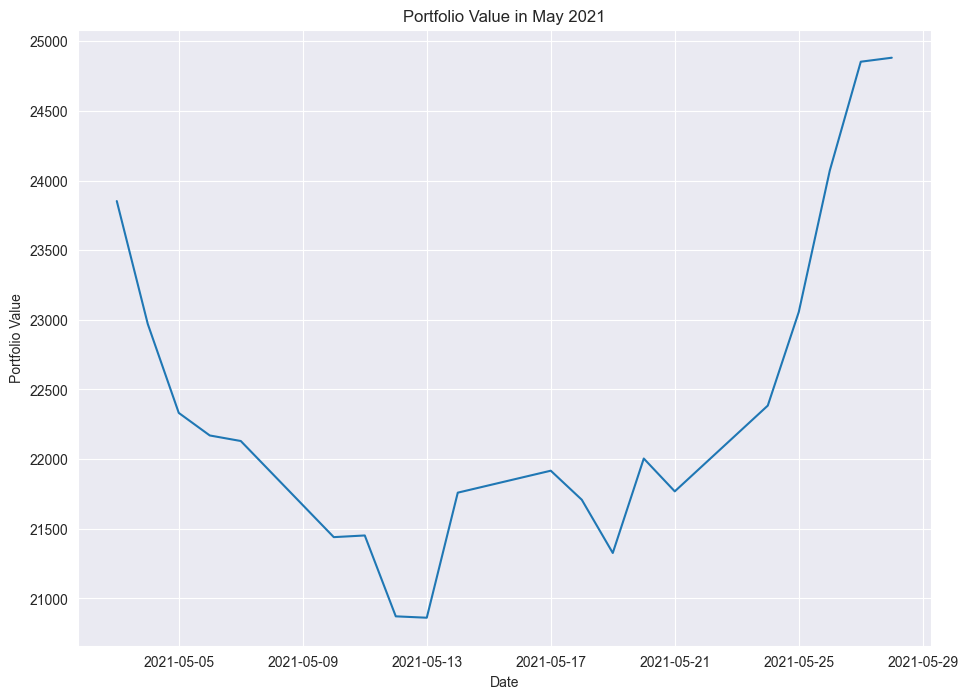

In [42]:
# TODO: Create a 2D NumPy array which represent the number of shares per stock. Then use the dot product, to find the value of the entire portfolio for each day in May. Create a data frame with the dates and the portfolio values.

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import yfinance as yf

# Starter code for your figure
fig = plt.figure( figsize=(11,8) )

# Your code goes here
# Download historical stock data 
symbols = ['AAPL', 'BYND', 'CVX', 'GME', 'MRNA']
price_data = yf.download(tickers=symbols, start='2021-05-01', end='2021-05-31', interval='1d')['Close']

# Convert the price_data DataFrame to a 2D NumPy array
price_data_2d_array = price_data.values

# Create a 2D NumPy array with the number of shares per stock
shares = np.array([20, 30, 40, 50, 60])  

# Calculate the portfolio value using dot product
portfolio_values = price_data_2d_array.dot(shares)

# Create a DataFrame with dates/portfolio values
portfolio_df = pd.DataFrame(portfolio_values, index=price_data.index, columns=["Portfolio Value"])

# Added the following code to answer question 1
total_daily_costs = price_data.dot(shares)
# Find the day with the lowest total cost
min_cost_day = total_daily_costs.idxmin()
min_cost_value = total_daily_costs[min_cost_day]
print(f"The best day to buy the stocks is: {min_cost_day}")
print(f"The total cost of the portfolio on that day is: ${min_cost_value:.2f}")

portfolio_values = price_data.dot(shares)

# Added the following code to answer question 2
# Find the day with the highest total portfolio value
max_value_day = portfolio_values.idxmax()
max_value = portfolio_values[max_value_day]

print(f"The best day to sell the stocks is: {max_value_day}")
print(f"The total value of the portfolio on that day is: ${max_value:.2f}")

# Plot
sns.lineplot(data=portfolio_df, x=portfolio_df.index, y="Portfolio Value")
plt.title("Portfolio Value in May 2021")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.show()

[*********************100%%**********************]  5 of 5 completed


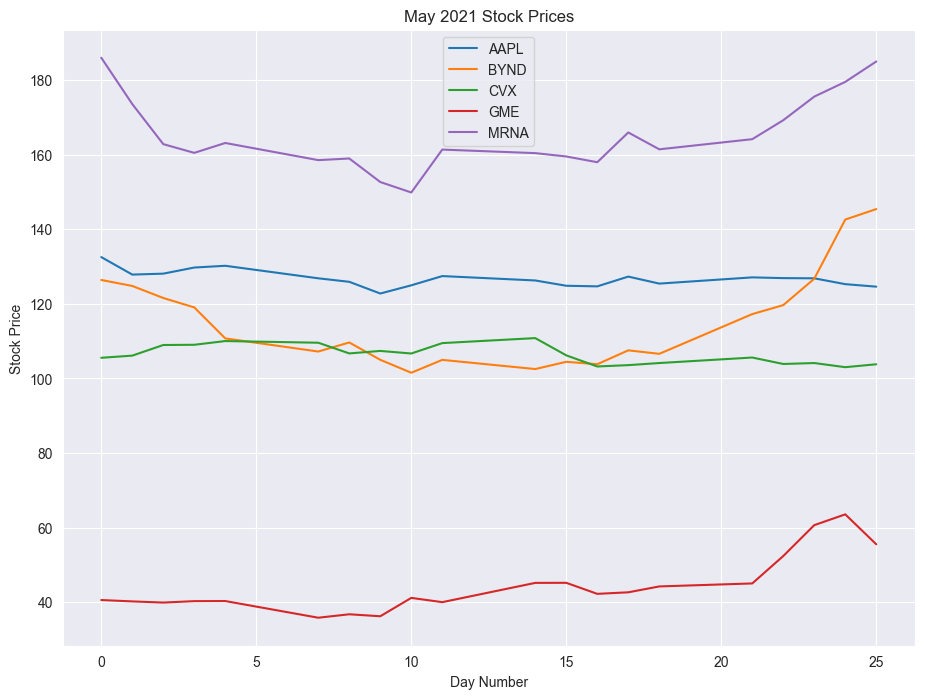

In [43]:
# TODO: Create a lineplot using seaborn that plots the prices for each stock. The x axis are the days (they can just be days numbered 0 through 20). The y axis is the price of the stocks. HINT: use the ```pd.melt()``` function to reconfigure the ```DataFrame``` so you can plot multiple lines using the ```hue``` parameter in the ```lineplot()``` function. After calling ```pd.melt()```, name the value column ```'Price'``` and the variable (column) name ```'Stock'```.

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import yfinance as yf

# Download historical stock data 
symbols = ['AAPL', 'BYND', 'CVX', 'GME', 'MRNA']
price_data = yf.download(tickers=symbols, start='2021-05-01', end='2021-05-31', interval='1d')['Close']

# Melt the DataFrame 
melted_data = pd.melt(price_data.reset_index(), id_vars=["Date"], var_name="Stock", value_name="Price")

# Add a day number column 
melted_data['Day'] = (melted_data['Date'] - melted_data['Date'].min()).dt.days

# Plot
fig, ax = plt.subplots(figsize=(11, 8))
sns.lineplot(data=melted_data, x="Day", y="Price", hue="Stock", ax=ax)

plt.title("May 2021 Stock Prices")
plt.xlabel("Day Number")
plt.ylabel("Stock Price")
# The location of the legend
plt.legend(loc='best')
plt.show()

### Questions

Answer the following questions:

1. Given the quantities of each stock listed above, which is the best day to BUY those stocks? That is, which day was the cheapest to buy those stocks? How much will it cost to make all the purchases in that portfolio on that day? 

2. Given the quantities of each stock list above, which is the best day to SELL those stocks? That is, which day did the portfolio have the highest total values? How much will we get if we sold all the stocks in that portfolio on that day?

3. Select one of the stocks that had some sizeable movements in prices. Briefly describe what happened with that company that caused those movements. 

### Answers

1. The best day to buy the stocks is 5/13/2021 The total cost of the portfolio on that day is 20,860.65

2. The best day to sell the stocks is 5/28/2021 The total value of the portfolio on that day is $24,882.00

3. GameStop had sizeable and volatile movement during this time because of individual retail investors collaborating to pump the stock price up, hedging against hedge funds that were taking a short position in GameStop stock. It was an interesting period of time for this stock because it proved that a collective of individuals could manipulate a market through social media channels, specifically Reddit where the forum Wall Street Bets communicated in order to squeeze the stock price.